In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import copy
import tensorflow as tf

import os
import time
import numpy as np
from IPython.display import clear_output
import sys
import csv
import math
from matplotlib import colors
import fcn32_new_wval as fcn32_vgg
import csv


ckpt_dir = "/mnt/data3/Game_data/ckpt_dir/fcn32_game.ckpt"

PRETRAINED_MODEL_PATH= None #"/mnt/data3/Game_data/ckpt_dir/

WEIGHT_PATH = "/mnt/data1/imagenet-data/weights/vgg-epoch-78.npy"

TRAINSET_PATH1 = '/mnt/data3/Game_data/csv_files/gamedata_train1.csv'
TRAINSET_PATH2 = '/mnt/data3/Game_data/csv_files/gamedata_train2.csv'
VALSET_PATH1 = '/mnt/data3/Game_data/csv_files/gamedata_val1.csv'
VALSET_PATH2 = '/mnt/data3/Game_data/csv_files/gamedata_val2.csv'

data_csv_path = 'fcn32_game.csv'


NUM_OF_CLASSESS = 19
BATCH_SIZE = 1
IMAGE_HEIGHT1 = 1052
IMAGE_HEIGHT2 = 1046
IMAGE_WIDTH = 1914
NUM_CHANNELS = 3
N_EPOCHS = 300

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
train_csv_file=open(TRAINSET_PATH1,"r")
train_filepaths=[]
train_labels=[]
train_masks=[]
for line in train_csv_file:
    filepath, label, mask= line.split(",")
    train_filepaths.append(filepath)
    train_labels.append(label)
    train_masks.append(mask.split("\r")[0])
    
train_image_path1, train_label_path1, train_mask_path1 = tf.train.slice_input_producer([train_filepaths,train_labels, train_masks]
                                           ,capacity = 16114)
#csv_path = tf.train.string_input_producer([TRAINSET_PATH])
#textReader = tf.TextLineReader()
#_, content = textReader.read(csv_path)
#one_ex = tf.decode_csv(content, record_defaults=[[""], [""], [""]])

train_image_content1 = tf.read_file(train_image_path1)
train_image1 = tf.image.decode_png(train_image_content1, channels=3)
train_image1.set_shape([IMAGE_HEIGHT1, IMAGE_WIDTH, NUM_CHANNELS])
train_image1 = tf.cast(train_image1, tf.float32)

train_label_content1 = tf.read_file(train_label_path1)
train_label1 = tf.image.decode_png(train_label_content1, channels=1)
train_label1.set_shape([IMAGE_HEIGHT1, IMAGE_WIDTH, 1])
train_label1=tf.squeeze(train_label1, squeeze_dims=[2])

#record_bytes=2097152
#reader=tf.FixedLengthRecordReader(record_bytes)
train_mask_content1 =tf.read_file(train_mask_path1)
train_mask1=tf.decode_raw(train_mask_content1,tf.uint8)
train_mask1.set_shape([2013528])
#mask=tf.cast(mask, tf.float32)


val_csv_file=open(VALSET_PATH1,"r")
val_filepaths=[]
val_labels=[]
val_masks=[]
for line in val_csv_file:
    filepath, label, mask= line.split(",")
    val_filepaths.append(filepath)
    val_labels.append(label)
    val_masks.append(mask.split("\r")[0])
    
val_image_path1, val_label_path1, val_mask_path1 = tf.train.slice_input_producer([val_filepaths,val_labels, val_masks]
                                           ,capacity = 1979)
#csv_path = tf.train.string_input_producer([TRAINSET_PATH])
#textReader = tf.TextLineReader()
#_, content = textReader.read(csv_path)
#one_ex = tf.decode_csv(content, record_defaults=[[""], [""], [""]])

val_image_content1 = tf.read_file(val_image_path1)
val_image1 = tf.image.decode_png(val_image_content1, channels=3)
val_image1.set_shape([IMAGE_HEIGHT1, IMAGE_WIDTH, NUM_CHANNELS])
val_image1 = tf.cast(val_image1, tf.float32)

val_label_content1 = tf.read_file(val_label_path1)
val_label1 = tf.image.decode_png(val_label_content1, channels=1)
val_label1.set_shape([IMAGE_HEIGHT1, IMAGE_WIDTH, 1])
val_label1=tf.squeeze(val_label1, squeeze_dims=[2])

#record_bytes=2097152
#reader=tf.FixedLengthRecordReader(record_bytes)
val_mask_content1 =tf.read_file(val_mask_path1)
val_mask1=tf.decode_raw(val_mask_content1,tf.uint8)
val_mask1.set_shape([2013528])
#mask=tf.cast(mask, tf.float32)



train_image_batch1, train_label_batch1, train_mask_batch1= tf.train.batch([train_image1, train_label1, train_mask1], batch_size=BATCH_SIZE,
                                                               capacity=100 + 3 * BATCH_SIZE,
                                                               num_threads=7)

val_image_batch1, val_label_batch1, val_mask_batch1= tf.train.batch([val_image1, val_label1, val_mask1], batch_size=BATCH_SIZE,
                                                               capacity=50 + 3 * BATCH_SIZE,
                                                               num_threads=7)


train_csv_file=open(TRAINSET_PATH2,"r")
train_filepaths=[]
train_labels=[]
train_masks=[]
for line in train_csv_file:
    filepath, label, mask= line.split(",")
    train_filepaths.append(filepath)
    train_labels.append(label)
    train_masks.append(mask.split("\r")[0])


train_image_path2, train_label_path2, train_mask_path2 = tf.train.slice_input_producer([train_filepaths,train_labels, train_masks]
                                           ,capacity = 3836)
#csv_path = tf.train.string_input_producer([TRAINSET_PATH])
#textReader = tf.TextLineReader()
#_, content = textReader.read(csv_path)
#one_ex = tf.decode_csv(content, record_defaults=[[""], [""], [""]])

train_image_content2 = tf.read_file(train_image_path2)
train_image2 = tf.image.decode_png(train_image_content2, channels=3)
train_image2.set_shape([IMAGE_HEIGHT2, IMAGE_WIDTH, NUM_CHANNELS])
train_image2 = tf.cast(train_image2, tf.float32)

train_label_content2 = tf.read_file(train_label_path2)
train_label2 = tf.image.decode_png(train_label_content2, channels=1)
train_label2.set_shape([IMAGE_HEIGHT2, IMAGE_WIDTH, 1])
train_label2=tf.squeeze(train_label2, squeeze_dims=[2])

#record_bytes=2097152
#reader=tf.FixedLengthRecordReader(record_bytes)
train_mask_content2 =tf.read_file(train_mask_path2)
train_mask2=tf.decode_raw(train_mask_content2,tf.uint8)
train_mask2.set_shape([2002044])
#mask=tf.cast(mask, tf.float32)


val_csv_file=open(VALSET_PATH2,"r")
val_filepaths=[]
val_labels=[]
val_masks=[]
for line in val_csv_file:
    filepath, label, mask= line.split(",")
    val_filepaths.append(filepath)
    val_labels.append(label)
    val_masks.append(mask.split("\r")[0])
    
val_image_path2, val_label_path2, val_mask_path2 = tf.train.slice_input_producer([val_filepaths,val_labels, val_masks]
                                           ,capacity = 516)
#csv_path = tf.train.string_input_producer([TRAINSET_PATH])
#textReader = tf.TextLineReader()
#_, content = textReader.read(csv_path)
#one_ex = tf.decode_csv(content, record_defaults=[[""], [""], [""]])

val_image_content2 = tf.read_file(val_image_path2)
val_image2 = tf.image.decode_png(val_image_content2, channels=3)
val_image2.set_shape([IMAGE_HEIGHT2, IMAGE_WIDTH, NUM_CHANNELS])
val_image2 = tf.cast(val_image2, tf.float32)

val_label_content2 = tf.read_file(val_label_path2)
val_label2 = tf.image.decode_png(val_label_content2, channels=1)
val_label2.set_shape([IMAGE_HEIGHT2, IMAGE_WIDTH, 1])
val_label2=tf.squeeze(val_label2, squeeze_dims=[2])

#record_bytes=2097152
#reader=tf.FixedLengthRecordReader(record_bytes)
val_mask_content2 =tf.read_file(val_mask_path2)
val_mask2=tf.decode_raw(val_mask_content2,tf.uint8)
val_mask2.set_shape([2002044])
#mask=tf.cast(mask, tf.float32)



train_image_batch2, train_label_batch2, train_mask_batch2= tf.train.batch([train_image2, train_label2, train_mask2], batch_size=BATCH_SIZE,
                                                               capacity=100 + 3 * BATCH_SIZE,
                                                               num_threads=7)

val_image_batch2, val_label_batch2, val_mask_batch2= tf.train.batch([val_image2, val_label2, val_mask2], batch_size=BATCH_SIZE,
                                                               capacity=50 + 3 * BATCH_SIZE,
                                                               num_threads=7)





with tf.device('/gpu:0'):
    sess = tf.Session()
    #images_tf = tf.placeholder(tf.float32,[None, 1024, 2048, 3])
    #labels_tf = tf.placeholder(tf.int32,[None, 1024, 2048])
    #masks_tf = tf.placeholder(tf.float32,[None,2097152])
    train_mode = tf.placeholder(tf.bool)
    selection = tf.placeholder(tf.bool)
    
    vgg_fcn = fcn32_vgg.FCN32VGG(WEIGHT_PATH)#('./vgg16.npy')
    
    if selection is not None:
        train_image_batch=tf.cond(selection, lambda:train_image_batch1, lambda:train_image_batch2)
        val_image_batch=tf.cond(selection, lambda:val_image_batch1, lambda:val_image_batch2)
        
        train_label_batch=tf.cond(selection, lambda:train_label_batch1, lambda:train_label_batch2)
        val_label_batch=tf.cond(selection, lambda:val_label_batch1, lambda:val_label_batch2)
        
        train_mask_batch=tf.cond(selection, lambda:train_mask_batch1, lambda:train_mask_batch2)
        val_mask_batch=tf.cond(selection, lambda:val_mask_batch1, lambda:val_mask_batch2)
        
        
    if train_mode is not None:
        images_tf=tf.cond(train_mode, lambda:train_image_batch, lambda:val_image_batch)
        labels_tf=tf.cond(train_mode, lambda:train_label_batch, lambda:val_label_batch)
        masks_tf=tf.cond(train_mode, lambda:train_mask_batch, lambda:val_mask_batch)
                          
    with tf.name_scope("content_vgg"):
        vgg_fcn.build(images_tf, train=train_mode, num_classes=19, random_init_fc8=True, debug=False)


    #head=[]
    #sum_of_weights=tf.reduce_sum(weights)
    #labels_oh= tf.one_hot(labels_tf,19)
    
    labels_tf_flat=tf.reshape(tf.mul(tf.reshape(labels_tf,[-1]),masks_tf),[-1])
    #mask_reshped=tf.reshape(masks_tf,[1024,2048])
    #labels_tf_flat2= tf.gather(labels_tf_flat,tf.where(tf.not_equal(labels_tf_flat,19))[1])
    logits = tf.reshape(vgg_fcn.upscore, (-1, NUM_OF_CLASSESS))
    #logits = tf.gather(logits,tf.where(tf.not_equal(labels_tf_flat,19)))
    labels_tf_flat = tf.cast(labels_tf_flat, tf.int32)

    #epsilon = tf.constant(value=1e-4)
    #logits = logits + epsilon
    #labels_flat_sparse = tf.reshape(labels_oh, (-1, NUM_OF_CLASSESS))
    #labels_flat_sparse=tf.cast(labels_flat_sparse, tf.float64)
    #ww_flat=tf.reshape(weights,[-1])
    #ww_flat = tf.cast(ww_flat, tf.float64)
    #softmax = tf.nn.softmax(logits)
    #softmax = tf.cast(softmax, tf.float64)
    #test1=-tf.reduce_sum(labels_flat_sparse * tf.log(softmax), reduction_indices=[1])
    #test2=tf.reduce_sum(test1)
    #cross_entropy = tf.mul(-tf.reduce_sum(labels_flat_sparse * tf.log(softmax), reduction_indices=[1]),ww_flat)
    #cross_entropy = -tf.reduce_sum(labels_flat_sparse * tf.log(softmax), reduction_indices=[1])
    #mask_flat=tf.reshape(train_mask_batch,[-1])
    masks_tf=tf.cast(masks_tf, tf.float32)
    cross_entropy =tf.mul(tf.nn.sparse_softmax_cross_entropy_with_logits(logits,labels_tf_flat),masks_tf)
    #cross_entropy_sum= tf.reduce_sum(cross_entropy,
    #                                name='xentropy_mean')
    #cross_entropy_mean = tf.reduce_mean(cross_entropy,name='xentropy_mean')
    #cross_entropy_mean = cross_entropy_sum/tf.cast(sum_of_weights, tf.float32)
    cross_entropy_mean = tf.reduce_mean(cross_entropy,
                                        name='xentropy_mean')
    l2_loss=tf.reduce_sum(tf.get_collection("losses"))
    total_loss=cross_entropy_mean +l2_loss
    #loss_tf = tf.reduce_mean((tf.nn.sparse_softmax_cross_entropy_with_logits(vgg_fcn.upscore,
     #                                                                     tf.squeeze(labels_tf, squeeze_dims=[3]),
      #                                                                    name="entropy")))
    
    
    
    
    #train_op = tf.train.MomentumOptimizer(0.0001, 0.99).minimize(cross_entropy_mean)
    train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cross_entropy_mean)
    predictions=tf.argmax(logits, 1)
    #labels_tf_flat=tf.reshape(labels_tf_flat,[-1])
    #labels_flat=tf.cast(labels_tf_flat, tf.int64)
    pred_flat=tf.reshape(predictions,[-1])
with tf.device('/cpu:0'):
    miou,update_cm=tf.contrib.metrics.streaming_mean_iou(pred_flat,labels_tf_flat,19,weights=masks_tf)
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)
    saver = tf.train.Saver(max_to_keep=150)
with tf.device('/gpu:0'):
    print('Finished building Network.')
    
    init_op = tf.group(tf.initialize_all_variables(),
                       tf.initialize_local_variables())
    sess.run(init_op)
        
    if PRETRAINED_MODEL_PATH:
        print "using Pretrained model"
        ckpt = tf.train.get_checkpoint_state(PRETRAINED_MODEL_PATH)
        print(ckpt)
        saver.restore(sess,ckpt.model_checkpoint_path)
        
    # print(csv_path)
    # For populating queues with batches, very important!
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    print("finished")

Model Loaded
conv1_1 Value Loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
conv1_1 Frozen
conv1_1 (64,) Value Loaded


conv1_2 Value Loaded
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
L2 Loss Added
conv1_2 (64,) Value Loaded


conv2_1 Value Loaded
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
L2 Loss Added
conv2_1 (128,) Value Loaded


conv2_2 Value Loaded
Layer name: conv2_2
Layer shape: (3, 3, 128, 128)
L2 Loss Added
conv2_2 (128,) Value Loaded


conv3_1 Value Loaded
Layer name: conv3_1
Layer shape: (3, 3, 128, 256)
L2 Loss Added
conv3_1 (256,) Value Loaded


conv3_2 Value Loaded
Layer name: conv3_2
Layer shape: (3, 3, 256, 256)
L2 Loss Added
conv3_2 (256,) Value Loaded


conv3_3 Value Loaded
Layer name: conv3_3
Layer shape: (3, 3, 256, 256)
L2 Loss Added
conv3_3 (256,) Value Loaded


conv4_1 Value Loaded
Layer name: conv4_1
Layer shape: (3, 3, 256, 512)
L2 Loss Added
conv4_1 (512,) Value Loaded


conv4_2 Value Loaded
Layer name: conv4_2
Layer shape: (3, 3, 512, 512)
L2 

In [2]:
epoch = 0

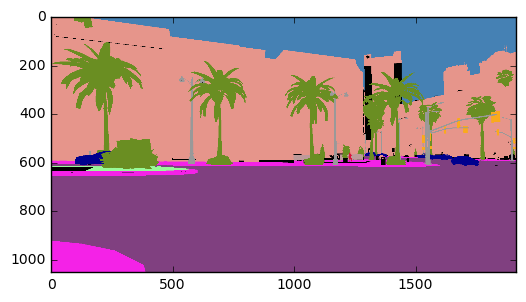

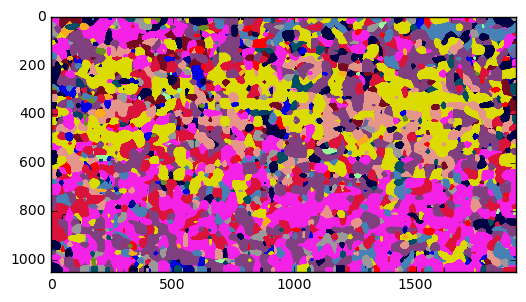

1999

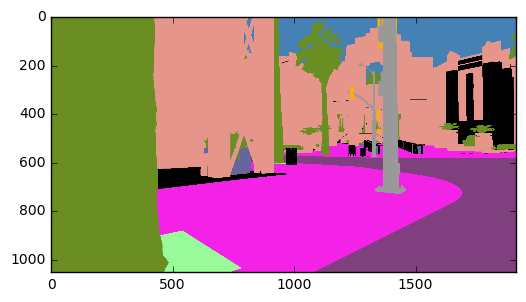

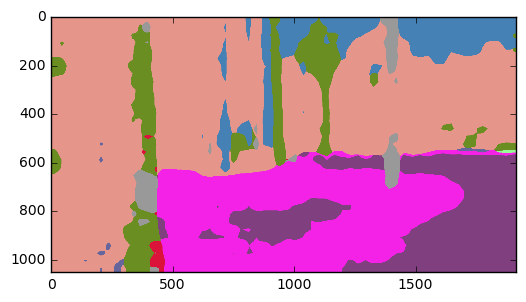

3999

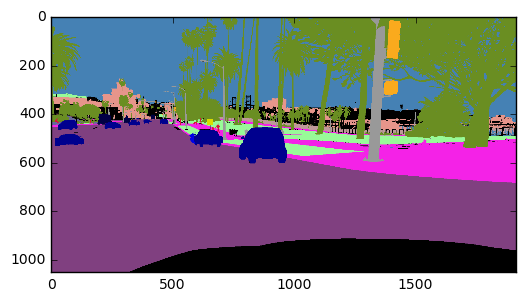

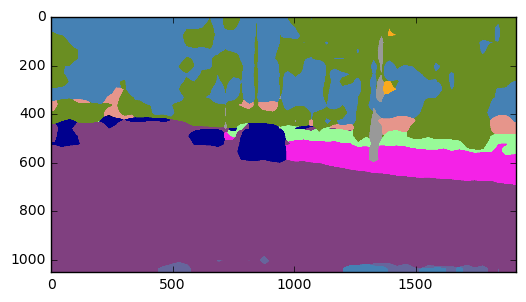

5999

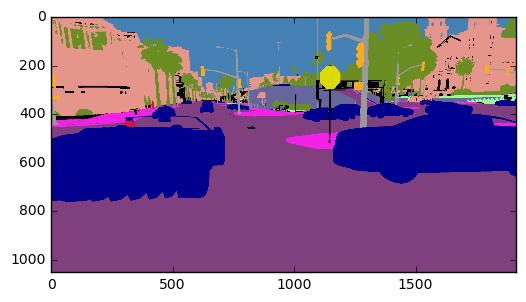

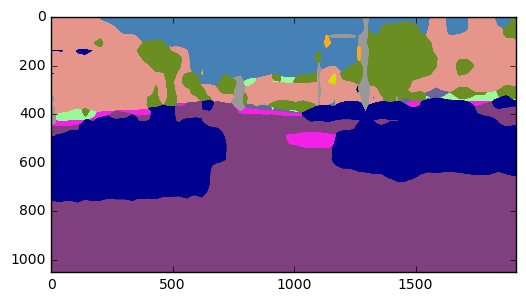

7447

In [ ]:
total_train_loss_list,train_loss_list,plot_train_loss,plot_total_train_loss,plot_train_miou= [],[],[],[],[]
val_loss_list,plot_val_loss,plot_val_miou= [],[],[]
#for epoch in xrange(N_EPOCHS):
cmap = colors.ListedColormap([[0.4667,0.0431,0.1254],[0.902,0.5882,0.5490],[0,0.2353,0.3921]
                              ,[0,0,0.5569],[0.7451,0.6,0.6],[0,0,0.902]
                              ,[0.8627,0.0784,0.2352],[0.6,0.6,0.6],[1,0,0]
                              ,[0.502,0.251,0.502],[0.9569,0.1372,0.9098],[0.2745,0.5098,0.7059]
                              ,[0.5961,0.9843,0.5961],[0.9804,0.6667,0.1176],[0.8627,0.8627,0]
                              ,[0,0.3137,0.3922],[0,0,0.2745],[0.4196,0.5569,0.1372]
                              ,[0.4,0.4,0.6118],[0,0,0]])
norm=colors.NoNorm(0,19)
try:
    while not coord.should_stop() and epoch< N_EPOCHS:
        epoch+=1
        epoch_start_time = time.time()
        for iteration in xrange(16114/BATCH_SIZE): 
            if (iteration%2000==0):
                _,train_loss,total_train_loss,_,train_pred_pic, train_label_pic = sess.run([train_op,cross_entropy_mean,total_loss,
                                                            update_cm,vgg_fcn.pred_up,labels_tf],feed_dict={train_mode: True,selection:True})
                plt.figure(1)
                plt.imshow(train_label_pic[0],cmap=cmap,norm=norm)
                plt.figure(2)
                plt.imshow(train_pred_pic[0],cmap=cmap,norm=norm)
                #plt.figure(3)
                #plt.imshow(output2[0],cmap=cmap,norm=norm)
                plt.show()
            else:
                    _,train_loss,total_train_loss,_ = sess.run([train_op,cross_entropy_mean,total_loss,
                                                            update_cm],feed_dict={train_mode: True,selection:True})
            if(math.isnan(train_loss)):
                break
            train_loss_list.append(train_loss)
            total_train_loss_list.append(total_train_loss)
            sys.stdout.write('\r\r'+ str(iteration))
            sys.stdout.flush()
           
        for iteration in xrange(3836/BATCH_SIZE): 
            if (iteration%1500==0):
                _,train_loss,total_train_loss,_,train_pred_pic, train_label_pic = sess.run([train_op,cross_entropy_mean,total_loss,
                                                            update_cm,vgg_fcn.pred_up,labels_tf],feed_dict={train_mode: True,selection:False})
                plt.figure(1)
                plt.imshow(train_label_pic[0],cmap=cmap,norm=norm)
                plt.figure(2)
                plt.imshow(train_pred_pic[0],cmap=cmap,norm=norm)
                #plt.figure(3)
                #plt.imshow(output2[0],cmap=cmap,norm=norm)
                plt.show()
            else:
                    _,train_loss,total_train_loss,_ = sess.run([train_op,cross_entropy_mean,total_loss,
                                                            update_cm],feed_dict={train_mode: True,selection:False})
            if(math.isnan(train_loss)):
                break
            train_loss_list.append(train_loss)
            total_train_loss_list.append(total_train_loss)
            sys.stdout.write('\r\r'+ str(iteration))
            sys.stdout.flush()   

        train_iou=sess.run(miou)
        train_loss_mean = np.mean(train_loss_list)
        total_train_loss_mean=np.mean(total_train_loss_list)
        plot_train_loss.append(train_loss_mean)
        plot_total_train_loss.append(total_train_loss_mean)

        train_loss_list = []
        total_train_loss_list = []
        plot_train_miou.append(train_iou)
        
        var_miou = filter(lambda x: x.name.endswith('total_confusion_matrix:0'), tf.local_variables())
        init_miou=tf.initialize_variables(var_miou)
        sess.run(init_miou)
        
        
        
        for iteration in xrange(1979/BATCH_SIZE): 
            if (iteration%500==0):
                val_loss,_,val_pred_pic, val_label_pic = sess.run([cross_entropy_mean,
                                                            update_cm,vgg_fcn.pred_up,labels_tf],feed_dict={train_mode: False,selection:True})
                plt.figure(1)
                plt.imshow(val_label_pic[0],cmap=cmap,norm=norm)
                plt.figure(2)
                plt.imshow(val_pred_pic[0],cmap=cmap,norm=norm)
                #plt.figure(3)
                #plt.imshow(output2[0],cmap=cmap,norm=norm)
                plt.show()
            else:
                    val_loss,_ = sess.run([cross_entropy_mean,update_cm],feed_dict={train_mode: False,selection:True})
            val_loss_list.append(val_loss)
            sys.stdout.write('\r\r' + str(iteration))
            sys.stdout.flush()
        
        for iteration in xrange(516/BATCH_SIZE): 
            if (iteration%500==0):
                val_loss,_,val_pred_pic, val_label_pic = sess.run([cross_entropy_mean,
                                                            update_cm,vgg_fcn.pred_up,labels_tf],feed_dict={train_mode: False,selection:False})
                plt.figure(1)
                plt.imshow(val_label_pic[0],cmap=cmap,norm=norm)
                plt.figure(2)
                plt.imshow(val_pred_pic[0],cmap=cmap,norm=norm)
                #plt.figure(3)
                #plt.imshow(output2[0],cmap=cmap,norm=norm)
                plt.show()
            else:
                    val_loss,_ = sess.run([cross_entropy_mean,update_cm],feed_dict={train_mode: False,selection:False})
            val_loss_list.append(val_loss)
            sys.stdout.write('\r\r' + str(iteration))
            sys.stdout.flush()
        
            
        val_iou=sess.run(miou)    
        val_loss_mean = np.mean(val_loss_list)
        plot_val_loss.append(val_loss_mean)
        
        val_loss_list = []
        plot_val_miou.append(val_iou)
        
        var_miou = filter(lambda x: x.name.endswith('total_confusion_matrix:0'), tf.local_variables())
        init_miou=tf.initialize_variables(var_miou)
        sess.run(init_miou)
        
        clear_output()
        print "Epoch", epoch
        
        print "===========**Training ACCURACY**================"
        print 'Training mIOU: ', train_iou
        print "Training Loss:", train_loss_mean 
        print "Training Loss:", total_train_loss_mean 
        
        print "===========**VALIDATION ACCURACY**================"
        print 'Validation mIOU: ', val_iou
        print "Validation Loss:", val_loss_mean 
        
        print "=================**TIME**===================="
        print 'Time Elapsed for Epoch:' + str(epoch) + ' is ' + str(
                (time.time() - epoch_start_time) / 60.) + ' minutes'
        
        plt.figure(1) 
        dd = plt.plot(plot_total_train_loss,'r',label="Training")
        plt.title("Total LOSS")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.figure(2) 
        aa = plt.plot(plot_train_loss,'r',label="Training")
        aav = plt.plot(plot_val_loss,'g',label="Validation")
        plt.title("LOSS")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.figure(3)
        cc = plt.plot(plot_train_miou,'r',label="Training")
        aav = plt.plot(plot_val_miou,'g',label="Validation")
        plt.title("mIOU")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        saver.save(sess, ckpt_dir, global_step=epoch)
        ofile  = open(data_csv_path, "a")
        writer = csv.writer(ofile)
        timep=((time.time() - epoch_start_time) / 60.)
        writer.writerow([train_loss_mean,train_iou,timep,val_loss_mean,val_iou,epoch])
        ofile.close()
except tf.errors.OutOfRangeError:
    print ("out of range")
finally:
    coord.request_stop()
    coord.join(threads)
    print("requesting stop")
        #print(iou[1])
            #train_loss= sess.run(vgg_fcn.upscore,
             #   feed_dict={ images_tf: train_imbatch})
            #res=sess.run(image)
            #plt.imshow(train_labatch[0])
            #plt.show()
    #    aa= tt * np.log10(train_loss)
    #    print(len(aa))
    #    print(len(aa[0]))
    #print(sum)
    #print(sum2)
    #print(len(ww))
    #print(len(ww[0]))
    #print(len(ww[0][0]))




In [ ]:
#vgg_fcn.save_npy(sess, "/mnt/data3/FCN_random/FCN32/npy/fcn-random-epoch-" + str(epoch) + ".npy")